# Reading GIS File and Converting to NetworkX Graph

In [71]:
import networkx as nx
import geopandas as gpd
import momepy
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox

In [72]:
# Read the shapefile
shapefile_path = 'C:/Users/Sneez/Desktop/Snowplowing/Data+Info/GIS Data/MiddletonStreetsIntersctions_WithCoordinates/Streets_Middleton.shp'
street_gdf = gpd.read_file(shapefile_path)
street_gdf.head()

,fullStreet,StreetSegm,FromName,ToName,Shape__Len,LengthMile,Depth_in,With_EE_ft,ROW_ft,PASER_Rati,...,PASER_Ra_3,CreationDa,PASER_Ra_4,Creator,PASER_Ra_5,EditDate,PASER_Ra_6,Editor,PASER_Ra_7,geometry
0,Adler Circle,Adler Cir_1,Adler Cir,Adler Cir,196.770471,0.037267,4.0,36.0,66.0,9.0,...,8.0,2022-04-27,6.0,skiley_Middleton,5.0,2024-01-05,6.0,skiley_Middleton,10.0,"LINESTRING (792441.167 492870.429, 792443.563 ..."
1,Adler Circle,Adler Cir_2,Pheasant Ln,Adler Cir,127.291821,0.024108,4.0,36.0,66.0,9.0,...,8.0,2022-04-27,6.0,skiley_Middleton,5.0,2024-01-05,6.0,skiley_Middleton,10.0,"LINESTRING (792464.540 492995.557, 792441.167 ..."
2,Airport Road EB US Highway 12 EB On,Airport Rd EB USH 12 EB On_1,Airport Rd,USH 12,1948.195616,0.368976,0.0,0.0,0.0,-1.0,...,-1.0,2022-04-27,-1.0,skiley_Middleton,-1.0,2024-01-05,-1.0,skiley_Middleton,0.0,"LINESTRING (785400.721 496237.953, 785406.269 ..."
3,Airport Road,Airport Rd_1,Evergreen Rd,Pleasant View Rd,894.248645,0.169365,4.0,52.0,110.0,8.0,...,8.0,2022-04-27,8.0,skiley_Middleton,8.0,2024-01-05,8.0,skiley_Middleton,8.0,"LINESTRING (779224.462 496134.420, 779521.593 ..."
4,Airport Road,Airport Rd_2,Pleasant View Rd,Deming Way,2310.136200,0.437526,5.0,52.0,110.0,8.0,...,8.0,2022-04-27,8.0,skiley_Middleton,8.0,2024-01-05,8.0,skiley_Middleton,8.0,"LINESTRING (780117.952 496169.313, 782427.907 ..."


Check if the widths of streets vary at all

In [145]:
widths = dict()
for i in range(0, len(street_gdf)):
    name = street_gdf['fullStreet'][i]
    width = street_gdf['With_EE_ft'][i]
    if name in widths:
        widths[name].add(width)
    else:
        widths[name] = {width}

# print out all items in dictionary
for name in widths:
    if len(widths[name]) > 1:
        print(name, widths[name])

Aurora Street {26.0, 36.0}
Bristol Street {32.0, 36.0}
Calla Pass {24.0, 0.0}
Century Avenue {0.0, 48.0, 52.0, 44.0}
Century Place {28.0, 22.0}
Clovernook Road {32.0, 36.0}
Companion Lane {36.0, 30.0}
Countryside Lane {16.0, 0.0}
Deming Way {40.0, 42.0, 44.0, 50.0, 56.0, 60.0}
Diversity Road {24.0, 18.0}
Elmwood Avenue {32.0, 36.0, 69.0}
Frank Lloyd Wright Avenue {40.0, 24.5, 26.0}
Franklin Avenue {32.0, 36.0}
Friendship Lane {24.0, 36.0}
Glacier Ridge Road {26.0, 20.0}
High Road {40.0, 0.0}
Hillcrest Avenue {24.0, 28.0}
Hubbard Avenue {40.0, 36.0, 28.0}
John Q Hammons Drive {0.0, 44.0}
Kenyon Drive {28.0, 36.0}
Lake Street {36.0, 52.0}
Lynn Street {32.0, 36.0}
Mendota Avenue {36.0, 20.0}
Mendota Drive {24.0, 27.0}
Middleton Street {0.0, 32.0, 36.0}
Misty Valley Drive {24.0, 0.0}
North Gateway Street {21.0, 22.0}
North High Point Road {40.0, 52.0}
North Avenue {32.0, 36.0}
Park Street {32.0, 40.0, 36.0}
Parmenter Street {32.0, 0.0, 36.0, 40.0, 46.0, 51.0, 52.0, 28.0}
Pleasant View Road

In [73]:
street_gdf['abvPostTyp'].unique()

array(['Cir', None, 'Rd', 'Way', 'Dr', 'Blvd', 'Ct', 'Ln', 'Ave', 'Pl',
       'St', 'Walk', 'Pkwy', 'Run', 'Hl', 'Pass', 'Trl', 'Ter', 'Loop',
       'Grn', 'Plz'], dtype=object)

In [74]:
street_gdf.columns

Index(['fullStreet', 'StreetSegm', 'FromName', 'ToName', 'Shape__Len',
       'LengthMile', 'Depth_in', 'With_EE_ft', 'ROW_ft', 'PASER_Rati',
       'RdCode', 'Jurisdicti', 'YearComple', 'ProjectNum', 'ProjectNam',
       'SurfaceMat', 'AADT', 'ADTMonthYe', 'AverageSpe', 'YearSpeedC',
       'CG_Type_Ev', 'CG_Type_Od', 'CG_Width_f', 'CG_Width_1', 'T_Width_ft',
       'T_Width__1', 'Sidewalk_L', 'Sidewalk_W', 'StreetSe_1', 'abvStreetN',
       'abvPreDire', 'abvPreType', 'abvPostTyp', 'abvPostDir', 'Maintained',
       'TrafficDir', 'SpeedDir', 'Class_MPO_', 'Culdesac_R', 'Type',
       'BaseMateri', 'DeveloperN', 'preType', 'BaseName', 'postType',
       'postDirect', 'Circle_YN', 'PASER_Ra_1', 'PASER_Ra_2', 'GlobalID',
       'PASER_Ra_3', 'CreationDa', 'PASER_Ra_4', 'Creator', 'PASER_Ra_5',
       'EditDate', 'PASER_Ra_6', 'Editor', 'PASER_Ra_7', 'geometry'],
      dtype='object')

<Axes: >

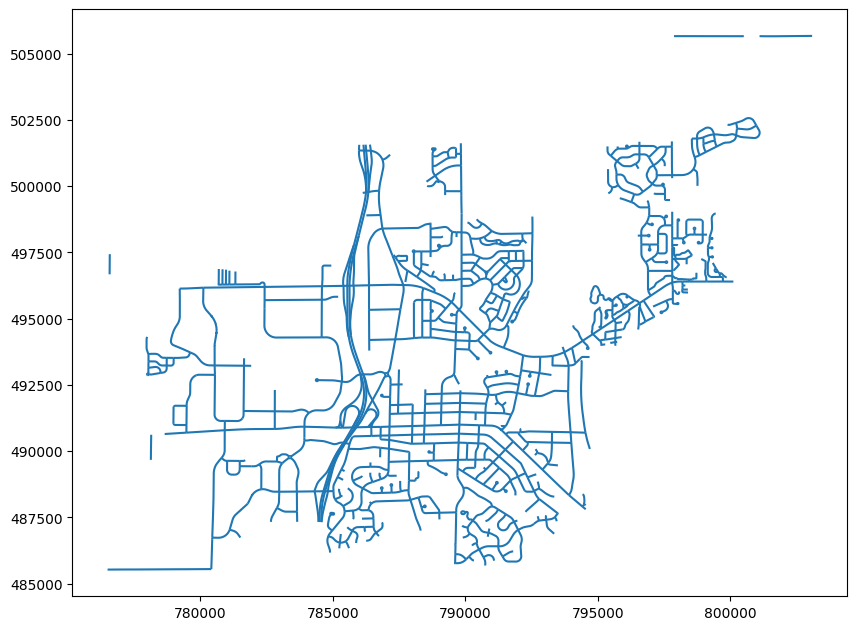

In [75]:
street_gdf.plot(figsize=(10,10))

In [76]:
gdf = street_gdf.explode()

C:\Users\Sneez\AppData\Local\Temp\ipykernel_10172\2360302560.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf = street_gdf.explode()


In [77]:
G_primal = momepy.gdf_to_nx(gdf, approach='primal')

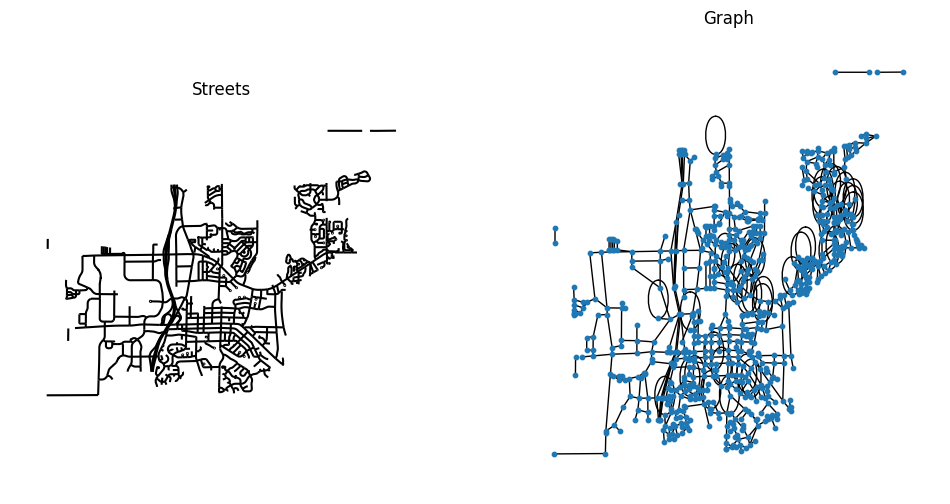

In [78]:
# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gdf.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Graph")[i])
    facet.axis("off")
nx.draw(G_primal, {n: [n[0], n[1]] for n in list(G_primal.nodes)}, ax=ax[1], node_size=10)

### Overlay this data with OpenStreetMap data

In [79]:
G_osm = ox.graph_from_place('Middleton, Wisconsin', network_type='drive')

In [123]:
nodes, edges = momepy.nx_to_gdf(G_osm, points=True, lines=True)
edges.columns

C:\Users\Sneez\AppData\Local\Temp\ipykernel_10172\1300208859.py:1: UserWarning: Approach is not set. Defaulting to 'primal'.
  nodes, edges = momepy.nx_to_gdf(G_osm, points=True, lines=True)


Index(['osmid', 'oneway', 'lanes', 'ref', 'name', 'highway', 'maxspeed',
       'reversed', 'length', 'geometry', 'bridge', 'junction', 'access',
       'node_start', 'node_end'],
      dtype='object')

In [81]:
edges.head()

,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,geometry,bridge,junction,access,node_start,node_end
0,871134221,True,2,CTH MS,University Avenue,primary,35 mph,False,10.805,None,NaN,NaN,NaN,0,514
1,"[700703012, 871134222]",True,2,NaN,Allen Boulevard,secondary,NaN,False,32.204,"LINESTRING (-89.48609 43.08982, -89.48604 43.0...",NaN,NaN,NaN,0,694
2,178715043,False,4,CTH M,Century Avenue,secondary,30 mph,False,6.678,None,NaN,NaN,NaN,1,755
3,6654382,False,NaN,NaN,Amherst Road,residential,NaN,True,189.262,"LINESTRING (-89.49026 43.10412, -89.49026 43.1...",NaN,NaN,NaN,1,91
4,178715043,False,4,CTH M,Century Avenue,secondary,30 mph,True,198.241,"LINESTRING (-89.49026 43.10412, -89.49056 43.1...",NaN,NaN,NaN,1,577


In [126]:
G_osm_undirected = G_osm.to_undirected()
nodes, edges = momepy.nx_to_gdf(G_osm, points=True, lines=True)
print(G_osm_undirected)
print(G_osm)
edges.head()

MultiGraph with 813 nodes and 1149 edges
MultiDiGraph with 813 nodes and 1941 edges


C:\Users\Sneez\AppData\Local\Temp\ipykernel_10172\2288619745.py:2: UserWarning: Approach is not set. Defaulting to 'primal'.
  nodes, edges = momepy.nx_to_gdf(G_osm, points=True, lines=True)


,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,geometry,bridge,junction,access,node_start,node_end
0,871134221,True,2,CTH MS,University Avenue,primary,35 mph,False,10.805,None,NaN,NaN,NaN,0,514
1,"[700703012, 871134222]",True,2,NaN,Allen Boulevard,secondary,NaN,False,32.204,"LINESTRING (-89.48609 43.08982, -89.48604 43.0...",NaN,NaN,NaN,0,694
2,178715043,False,4,CTH M,Century Avenue,secondary,30 mph,False,6.678,None,NaN,NaN,NaN,1,755
3,6654382,False,NaN,NaN,Amherst Road,residential,NaN,True,189.262,"LINESTRING (-89.49026 43.10412, -89.49026 43.1...",NaN,NaN,NaN,1,91
4,178715043,False,4,CTH M,Century Avenue,secondary,30 mph,True,198.241,"LINESTRING (-89.49026 43.10412, -89.49056 43.1...",NaN,NaN,NaN,1,577


## Get New Data

In [146]:
# Read the shapefile
shapefile_path = "C:/Users/Sneez/Desktop/Snowplowing/Data+Info/GIS Data/MiddletonStreetsDirected_JurisdictionAdded/main_edges.shp"
gdf = gpd.read_file(shapefile_path)
gdf.head()

,name,geom_Lengt,Jurisdicti,geometry
0,University Avenue,0.000117,State,"LINESTRING (-89.48609 43.08982, -89.48619 43.0..."
1,Allen Boulevard,0.000319,County,"LINESTRING (-89.48609 43.08982, -89.48604 43.0..."
2,Century Avenue,0.000082,County,"LINESTRING (-89.49026 43.10412, -89.49018 43.1..."
3,Amherst Road,0.001708,City,"LINESTRING (-89.49026 43.10412, -89.49026 43.1..."
4,Century Avenue,0.002431,County,"LINESTRING (-89.49026 43.10412, -89.49056 43.1..."


In [117]:
for name in gdf['name']:
    if name == '[\'John Muir Drive\', \'Ramsey Road\']':
        print(name)
        print(type(name))

['John Muir Drive', 'Ramsey Road']
<class 'str'>
['John Muir Drive', 'Ramsey Road']
<class 'str'>


c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


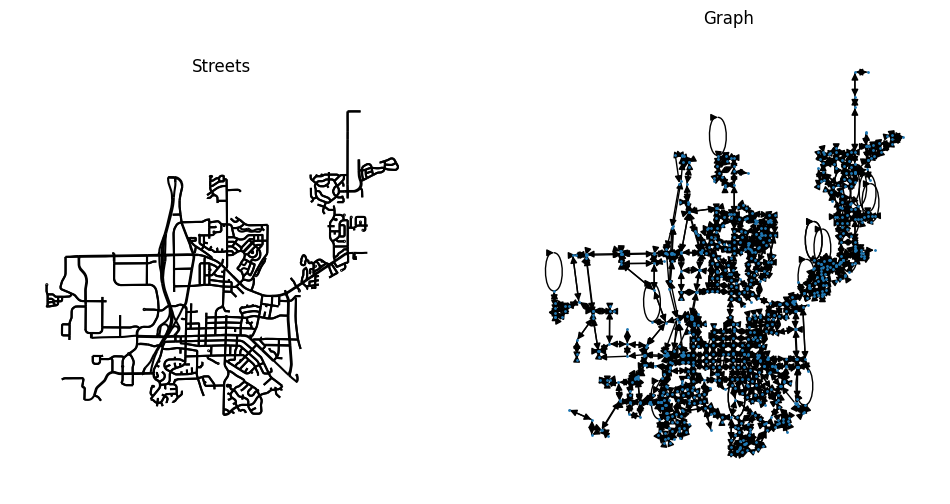

In [87]:
G_directed = momepy.gdf_to_nx(gdf, approach='primal', directed=True)
# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gdf.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Graph")[i])
    facet.axis("off")
nx.draw(G_directed, {n: [n[0], n[1]] for n in list(G_directed.nodes)}, ax=ax[1], node_size=1)



c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


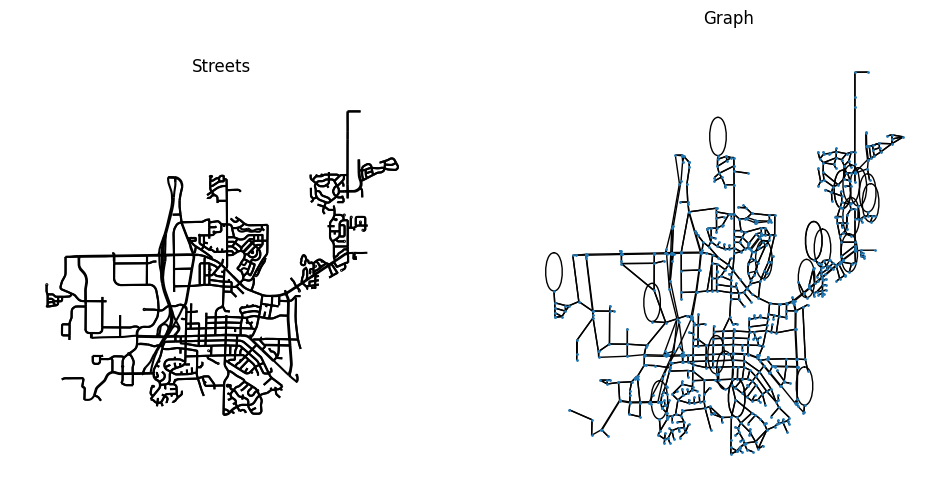

In [88]:
G_undirected = momepy.gdf_to_nx(gdf, approach='primal', directed=False)
# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
gdf.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Graph")[i])
    facet.axis("off")
nx.draw(G_undirected, {n: [n[0], n[1]] for n in list(G_undirected.nodes)}, ax=ax[1], node_size=1)

In [147]:
print(G_directed)
print(G_undirected)

MultiDiGraph with 813 nodes and 1941 edges
MultiGraph with 813 nodes and 1941 edges


In [89]:
i = 0
for edge in G_directed.edges(data=True):
    print(edge)
    i+=1
    if i > 5:
        break

((-89.48609149999999, 43.089819300000045), (-89.48618799999997, 43.08988620000008), {'name': 'University Avenue', 'geom_Lengt': 0.000117421718611, 'Jurisdicti': 'State', 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09)>, 'mm_len': 0.00011742171861134319})
((-89.48609149999999, 43.089819300000045), (-89.48589669999996, 43.090071100000046), {'name': 'Allen Boulevard', 'geom_Lengt': 0.000318921172371, 'Jurisdicti': 'County', 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09, -89.486 43.09)>, 'mm_len': 0.00031892117237084807})
((-89.48618799999997, 43.08988620000008), (-89.48651759999996, 43.09008680000005), {'name': 'University Avenue', 'geom_Lengt': 0.000385845958974, 'Jurisdicti': 'State', 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09, -89.487 43.09)>, 'mm_len': 0.0003858459589735557})
((-89.48589669999996, 43.090071100000046), (-89.48576209999999, 43.095172700000035), {'name': 'Allen Boulevard', 'geom_Lengt': 0.00519133951644, 'Jurisdicti': 'County', 'geometry': <LINE

In [90]:
for edge in G_undirected.edges(data=True):
    print(edge)

((-89.48609149999999, 43.089819300000045), (-89.48618799999997, 43.08988620000008), {'name': 'University Avenue', 'geom_Lengt': 0.000117421718611, 'Jurisdicti': 'State', 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09)>, 'mm_len': 0.00011742171861134319})
((-89.48609149999999, 43.089819300000045), (-89.48589669999996, 43.090071100000046), {'name': 'Allen Boulevard', 'geom_Lengt': 0.000318921172371, 'Jurisdicti': 'County', 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09, -89.486 43.09)>, 'mm_len': 0.00031892117237084807})
((-89.48609149999999, 43.089819300000045), (-89.48570759999996, 43.089563600000076), {'name': 'University Avenue', 'geom_Lengt': 0.000461260989037, 'Jurisdicti': 'State', 'geometry': <LINESTRING (-89.486 43.09, -89.486 43.09)>, 'mm_len': 0.0004612609890373895})
((-89.48618799999997, 43.08988620000008), (-89.48651759999996, 43.09008680000005), {'name': 'University Avenue', 'geom_Lengt': 0.000385845958974, 'Jurisdicti': 'State', 'geometry': <LINESTRING (-89.4

Check that the columns geometry are the same in gdf and edges:

In [124]:
G_complete = momepy.gdf_to_nx(gdf, approach='primal', directed=True)


c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length
